## **US Unemployment Dataset (2010 - 2020)**

#Lodaing Libraries and dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading dataset
unemp_db = pd.read_csv('/content/unemployment_data_us.csv',parse_dates=['Date'] )


#Data processing

In [ ]:
#Us unemployment data
unemp_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 132 non-null    int64         
 1   Month                132 non-null    object        
 2   Primary_School       123 non-null    float64       
 3   Date                 132 non-null    datetime64[ns]
 4   High_School          123 non-null    float64       
 5   Associates_Degree    123 non-null    float64       
 6   Professional_Degree  123 non-null    float64       
 7   White                123 non-null    float64       
 8   Black                123 non-null    float64       
 9   Asian                123 non-null    float64       
 10  Hispanic             123 non-null    float64       
 11  Men                  123 non-null    float64       
 12  Women                123 non-null    float64       
dtypes: datetime64[ns](1), float64(10), 

In [ ]:
#Clean data
unemp_db.head()

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,2010-01-01,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,2011-01-01,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,2012-01-01,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,2013-01-01,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,2014-01-01,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8


#**Unemployment with respect to education**

In [ ]:
#unemployment with respect to education
yr_degree = unemp_db.groupby('Year').agg(
    primary_scl_mean = ('Primary_School', 'mean'),
    primary_scl_std = ('Primary_School', 'std'),
    high_scl_mean = ('High_School', 'mean'),
    high_scl_std = ('High_School', 'std'),
    associates_degree_mean = ('Associates_Degree', 'mean'),
    associates_degree_std = ('Associates_Degree', 'std'),
    professional_degree_mean = ('Professional_Degree', 'mean'),
    professional_degree_std = ('Professional_Degree', 'std')
                                     ).round(decimals = 2)
yr_degree

,primary_scl_mean,primary_scl_std,high_scl_mean,high_scl_std,associates_degree_mean,associates_degree_std,professional_degree_mean,professional_degree_std
Year,,,,,,,,
2010,14.84,0.67,10.29,0.48,8.38,0.27,4.71,0.20
2011,14.08,0.53,9.42,0.40,7.97,0.35,4.31,0.12
2012,12.39,0.50,8.31,0.24,7.10,0.39,4.02,0.15
2013,10.96,0.55,7.51,0.31,6.37,0.23,3.70,0.21
2014,9.02,0.50,6.01,0.41,5.42,0.40,3.18,0.19
2015,7.94,0.70,5.44,0.16,4.51,0.34,2.57,0.14
2016,7.43,0.48,5.19,0.16,4.08,0.16,2.51,0.07
2017,6.51,0.67,4.65,0.33,3.75,0.16,2.32,0.13
2018,5.61,0.20,4.04,0.28,3.32,0.15,2.12,0.11


<Axes: xlabel='Year'>

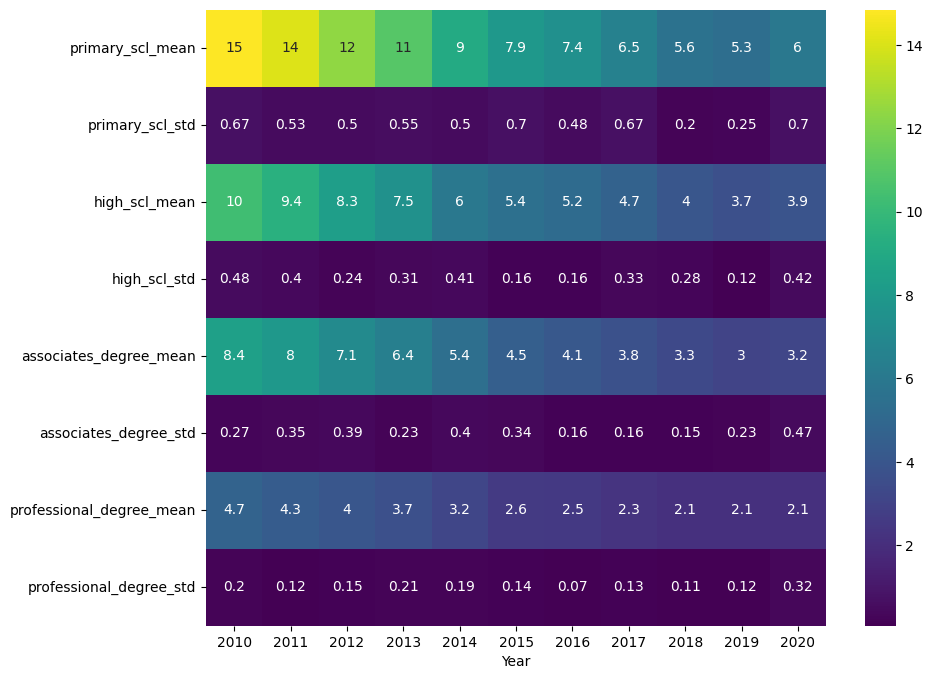

In [ ]:
#Visuvalizing unemployment withrespect to education
plt.figure(figsize = (10,8))
sns.heatmap(data = yr_degree.transpose(),cmap="viridis", annot = True)

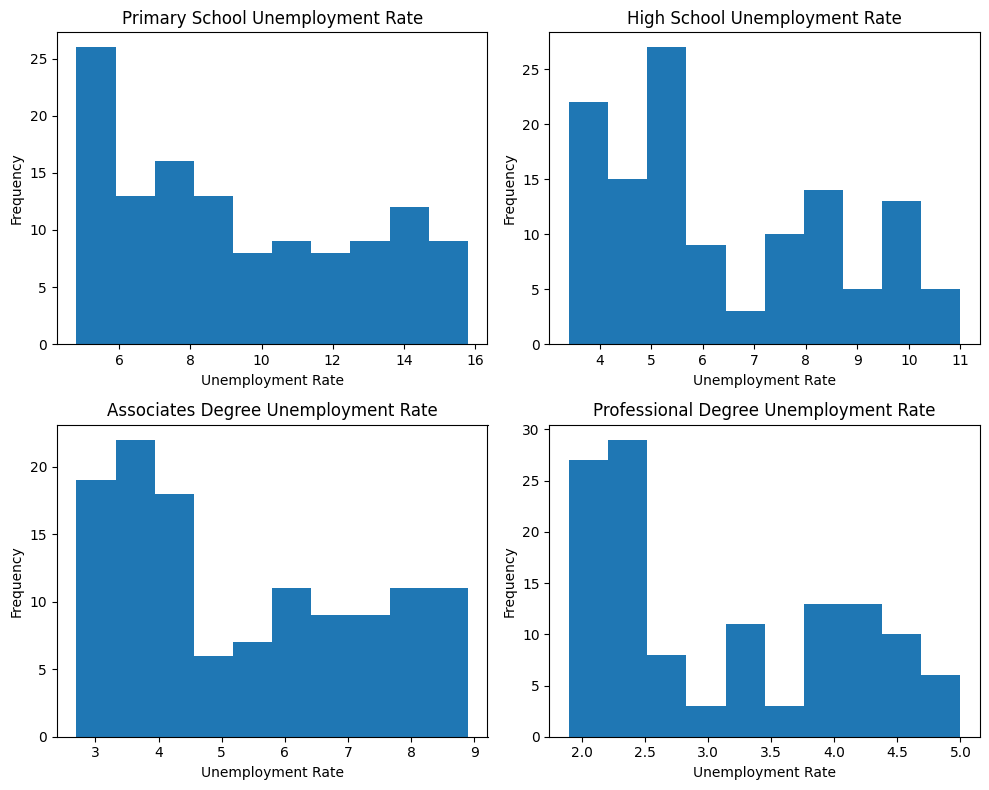

In [ ]:
# Select the unemployment rate data for each education level
primary_school = unemp_db['Primary_School']
high_school = unemp_db['High_School']
associates_degree = unemp_db['Associates_Degree']
professional_degree = unemp_db['Professional_Degree']

# Create a 2x2 grid of subplots for each education level
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot a histogram for each education level on a separate subplot
axs[0, 0].hist(primary_school, bins=10)
axs[0, 0].set_title('Primary School Unemployment Rate', fontsize=12)
axs[0, 0].set_xlabel('Unemployment Rate')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(high_school, bins=10)
axs[0, 1].set_title('High School Unemployment Rate', fontsize=12)
axs[0, 1].set_xlabel('Unemployment Rate')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(associates_degree, bins=10)
axs[1, 0].set_title('Associates Degree Unemployment Rate', fontsize=12)
axs[1, 0].set_xlabel('Unemployment Rate')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(professional_degree, bins=10)
axs[1, 1].set_title('Professional Degree Unemployment Rate', fontsize=12)
axs[1, 1].set_xlabel('Unemployment Rate')
axs[1, 1].set_ylabel('Frequency')

# Adjust the spacing between subplots and show the plot
plt.tight_layout()
plt.show()




---



#**Unemployment with respect to ethnicity**

In [ ]:
#unemployment with respect to ethnicity
yr_ethnicity = unemp_db.groupby('Year').agg(
    white_mean = ('White', 'mean'),
    white_std = ('White', 'std'),
    black_mean = ('Black', 'mean'),
    black_std = ('Black', 'std'),
    asian_mean = ('Asian', 'mean'),
    asian_std = ('Asian', 'std'),
    hispanic_mean = ('Hispanic', 'mean'),
    hispanic_std = ('Hispanic', 'std')
).round(decimals = 2)

yr_ethnicity

,white_mean,white_std,black_mean,black_std,asian_mean,asian_std,hispanic_mean,hispanic_std
Year,,,,,,,,
2010,8.72,0.17,15.96,0.50,7.50,0.49,12.49,0.36
2011,7.93,0.18,15.82,0.52,7.02,0.48,11.49,0.37
2012,7.19,0.23,13.82,0.37,5.90,0.61,10.32,0.47
2013,6.51,0.33,13.07,0.65,5.22,0.58,9.11,0.40
2014,5.30,0.35,11.34,0.52,4.98,0.62,7.40,0.64
2015,4.58,0.19,9.56,0.55,3.82,0.35,6.60,0.26
2016,4.28,0.08,8.43,0.33,3.64,0.42,5.78,0.28
2017,3.81,0.18,7.48,0.37,3.40,0.41,5.13,0.28
2018,3.46,0.13,6.49,0.41,3.00,0.32,4.68,0.24


<Axes: xlabel='Year'>

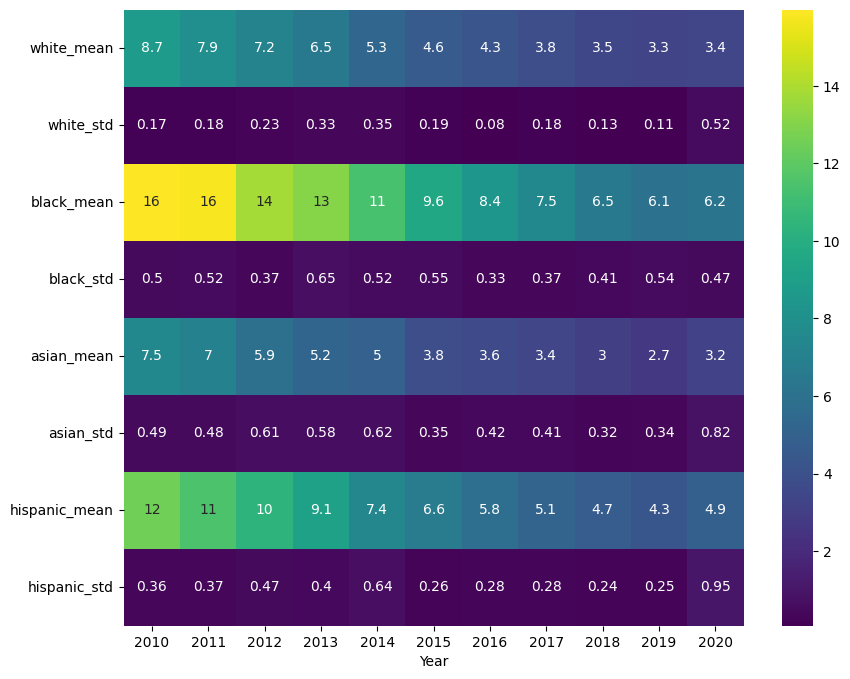

In [ ]:
#Visualizing unemployment withrespect to ethnicity
plt.figure(figsize = (10,8))
sns.heatmap(data = yr_ethnicity.transpose(),cmap="viridis", annot = True)

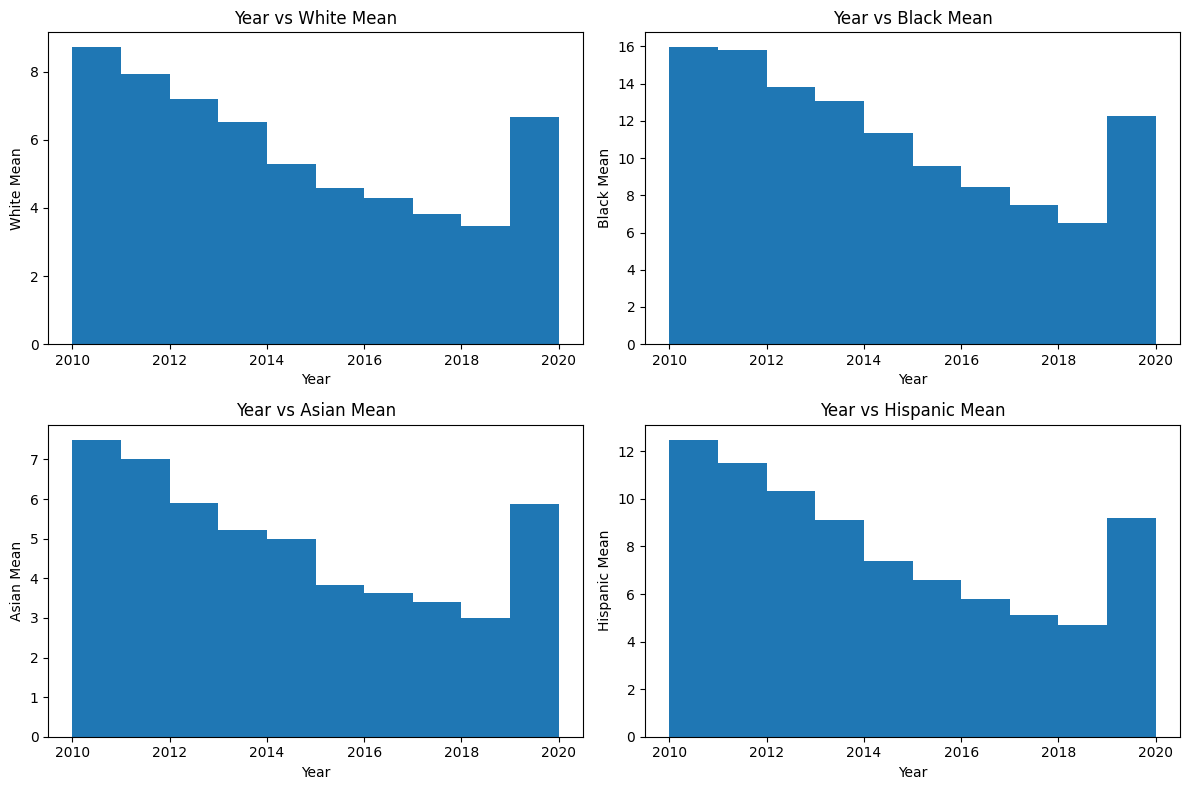

In [ ]:

# Plot the histograms for each ethnicity 
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(yr_ethnicity.index, weights=yr_ethnicity['white_mean'], bins=10)
axs[0, 0].set_title('Year vs White Mean')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('White Mean')

axs[0, 1].hist(yr_ethnicity.index, weights=yr_ethnicity['black_mean'], bins=10)
axs[0, 1].set_title('Year vs Black Mean')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Black Mean')

axs[1, 0].hist(yr_ethnicity.index, weights=yr_ethnicity['asian_mean'], bins=10)
axs[1, 0].set_title('Year vs Asian Mean')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Asian Mean')

axs[1, 1].hist(yr_ethnicity.index, weights=yr_ethnicity['hispanic_mean'], bins=10)
axs[1, 1].set_title('Year vs Hispanic Mean')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Hispanic Mean')

plt.tight_layout()
plt.show()




---



#**Unemployment with respect to Gender**

In [ ]:
#Unemployment withrespect to Gender
yr_gender = unemp_db.groupby('Year').agg(
    male_mean = ('Men', 'mean'),
    male_std = ('Men', 'std'),
    female_mean = ('Women', 'mean'),
    female_std = ('Women', 'std')
).round(decimals = 2)

print(yr_gender)

      male_mean  male_std  female_mean  female_std
Year                                              
2010       9.82      0.33         8.03        0.18
2011       8.70      0.31         7.92        0.12
2012       7.52      0.23         7.34        0.19
2013       6.98      0.30         6.53        0.37
2014       5.71      0.39         5.59        0.30
2015       4.91      0.24         4.77        0.20
2016       4.51      0.11         4.41        0.12
2017       4.00      0.20         3.97        0.21
2018       3.58      0.15         3.52        0.14
2019       3.35      0.18         3.28        0.14
2020       3.53      0.40         3.43        0.49


<Axes: xlabel='Year'>

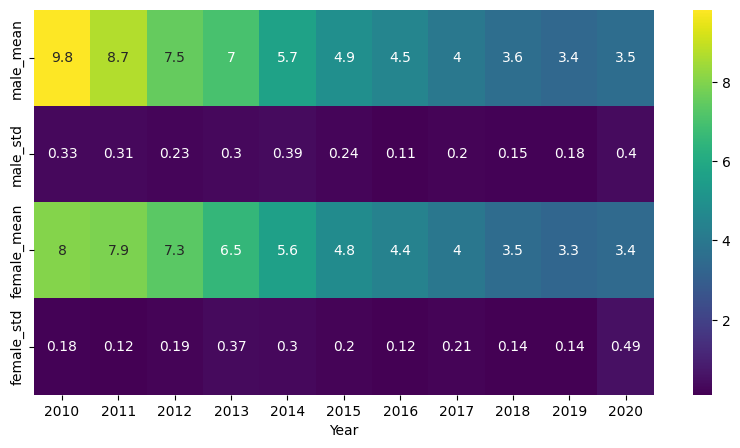

In [ ]:
#visualization
plt.figure(figsize = (10,5))
sns.heatmap(data = yr_gender.transpose(),cmap="viridis", annot = True)

Text(0.5, 1.0, 'Female Unemployment Rate by Year')

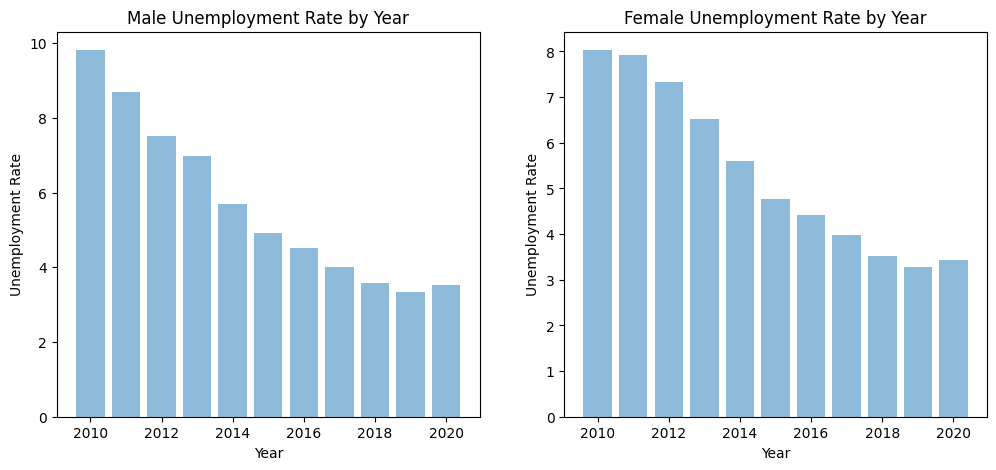

In [ ]:
# extract male and female means from year_gender DataFrame
male_means = yr_gender['male_mean']
female_means = yr_gender['female_mean']

# create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot male unemployment rates in first subplot
axs[0].bar(yr_gender.index, male_means, alpha=0.5)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Unemployment Rate')
axs[0].set_title('Male Unemployment Rate by Year')

# plot female unemployment rates in second subplot
axs[1].bar(yr_gender.index, female_means, alpha=0.5)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Unemployment Rate')
axs[1].set_title('Female Unemployment Rate by Year')

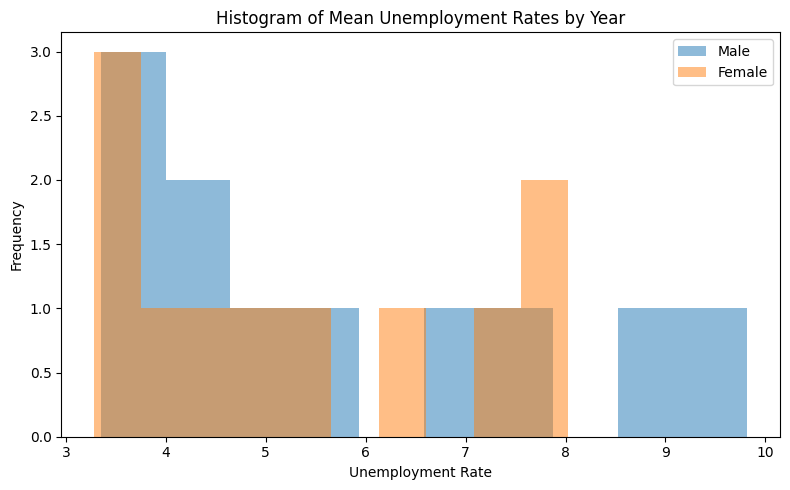

In [ ]:
# extract male and female means from year_gender DataFrame
male_means = yr_gender['male_mean']
female_means = yr_gender['female_mean']

# create figure with one subplot
fig, ax = plt.subplots(figsize=(8, 5))

# plot male and female mean unemployment rates
ax.hist(male_means, alpha=0.5, label='Male')
ax.hist(female_means, alpha=0.5, label='Female')

# set axis labels and title
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Mean Unemployment Rates by Year')

# add legend
ax.legend()

# adjust spacing between subplots
fig.tight_layout()




---



# **Unemployment comparison between 3 features**

Considering highest unemployment parameter from each feature

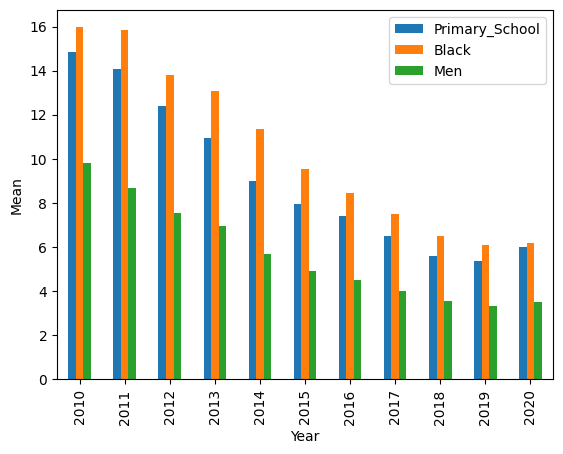

In [ ]:
# Select the relevant columns from the dataframe
data = unemp_db[['Year', 'Primary_School', 'Black', 'Men']]

# Group the data by year and calculate the mean for each group
data = data.groupby('Year').mean()

# Create a bar graph of the data
data.plot(kind='bar')

# Set the axis labels
plt.xlabel('Year')
plt.ylabel('Mean')

# Show the plot
plt.show()
